## Name: Abhedya Shukla
## House: Thanos
## Roll NO: 1828001

In [145]:
# importing all req libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import calendar
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import math
warnings.filterwarnings('ignore')

In [146]:
# read dataset 
df = pd.read_csv("1828001.csv")
print(df.shape)
df.head()

(50000, 19)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0100031704,DELHAIZE us,2019-12-17 00:00:00,2019.0,1.930204e+09,2019-11-29,20191129,20191129,20191214.0,USD,RV,1.0,NaN,108836.23,20191129.0,NAA8,1.930204e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-10-21 00:00:00,2019.0,1.929983e+09,2019-10-09,20191008,20191009,20191024.0,USD,RV,1.0,NaN,63424.63,20191009.0,NAH4,1.929983e+09,0
2,U001,0200761734,H E BUT llc,2020-03-11 00:00:00,2020.0,1.930567e+09,2020-02-26,20200225,20200226,20200312.0,USD,RV,1.0,NaN,121487.94,20200226.0,NAA8,1.930567e+09,0
3,U001,0200705742,DOT llc,2019-08-01 00:00:00,2019.0,1.929613e+09,2019-07-12,20190712,20190712,20190813.0,USD,RV,1.0,NaN,12850.60,20190712.0,NA32,1.929613e+09,0
4,U001,0200769623,WAL-MAR llc,2019-03-05 00:00:00,2019.0,1.928839e+09,2019-02-23,20190221,20190223,20190310.0,USD,RV,1.0,NaN,705.86,20190223.0,NAH4,1.928839e+09,0


In [147]:
print(df.columns)

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')


In [148]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
business_code             50000 non-null object
cust_number               50000 non-null object
name_customer             50000 non-null object
clear_date                46996 non-null object
buisness_year             50000 non-null float64
doc_id                    50000 non-null float64
posting_date              50000 non-null object
document_create_date      50000 non-null int64
document_create_date.1    50000 non-null int64
due_in_date               50000 non-null float64
invoice_currency          50000 non-null object
document type             50000 non-null object
posting_id                50000 non-null float64
area_business             0 non-null float64
total_open_amount         50000 non-null float64
baseline_create_date      50000 non-null float64
cust_payment_terms        50000 non-null object
invoice_id                49998 non-null float64
isOpen                   

In [149]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999800e+04,50000.000000
mean,2019.182980,2.012509e+09,2.019230e+07,2.019233e+07,2.019248e+07,1.0,NaN,31986.273330,2.019233e+07,2.012210e+09,0.060080
std,0.386654,2.820592e+08,3.742550e+03,3.733015e+03,3.746445e+03,0.0,NaN,39219.443216,3.731373e+03,2.780608e+08,0.237637
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018123e+07,1.0,NaN,0.180000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929218e+09,2.019042e+07,2.019042e+07,2.019051e+07,1.0,NaN,4704.845000,2.019042e+07,1.929218e+09,0.000000
50%,2019.000000,1.929779e+09,2.019080e+07,2.019080e+07,2.019082e+07,1.0,NaN,17273.285000,2.019080e+07,1.929779e+09,0.000000
75%,2019.000000,1.930356e+09,2.019112e+07,2.019112e+07,2.019120e+07,1.0,NaN,46351.797500,2.019112e+07,1.930356e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,815529.110000,2.020052e+07,2.960636e+09,1.000000


# Analysing Given dataset with graphs

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3004
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64


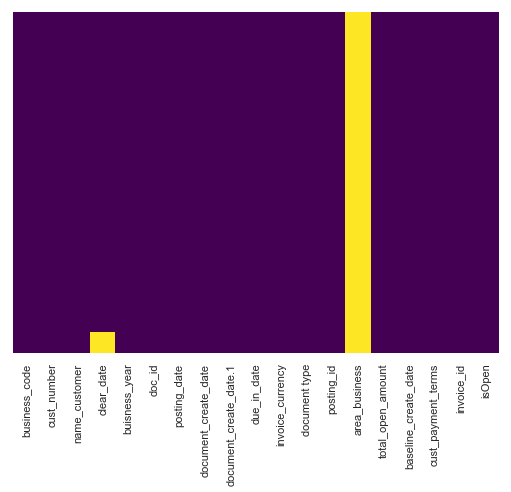

In [150]:
# heatmap to see null values in each col
sns.set(rc={'figure.figsize':(8.7,6.27)})
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
print(df.isnull().sum())

business_code                 6
cust_number                1412
name_customer              4263
clear_date                  407
buisness_year                 2
doc_id                    50000
posting_date                501
document_create_date        504
document_create_date.1      501
due_in_date                 544
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         45157
baseline_create_date        503
cust_payment_terms           72
invoice_id                49998
isOpen                        2
dtype: int64


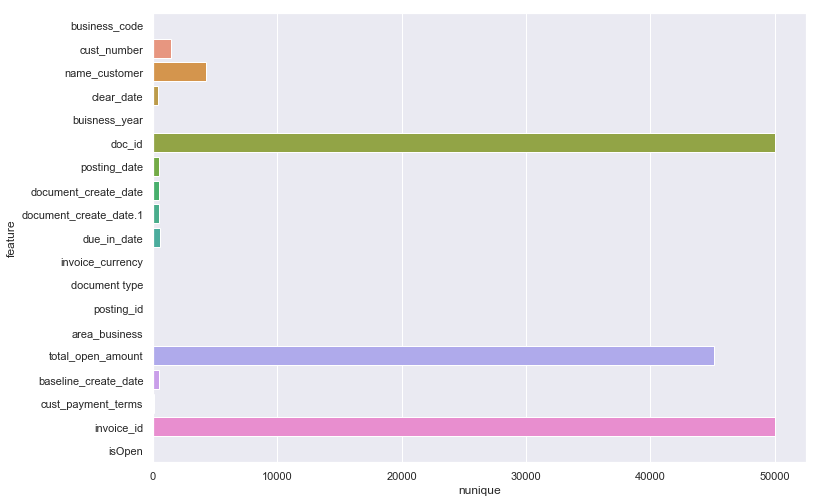

In [151]:
# barplot to see unique values in each col

sns.set(rc={'figure.figsize':(11.7,8.27)})
nu = df.nunique().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='nunique', y='feature', data=nu)
print(df.nunique())

RV    49998
X2        2
Name: document type, dtype: int64


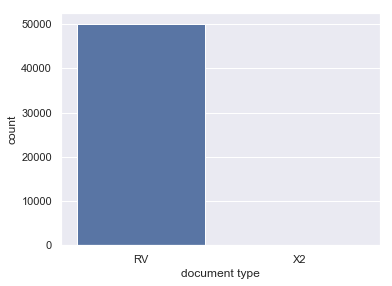

In [152]:
# countplot for 'document type'

sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.countplot(x ='document type', data = df)
print(df['document type'].value_counts())

U001    45221
CA02     3957
U013      644
U002      159
U005       15
U007        4
Name: business_code, dtype: int64


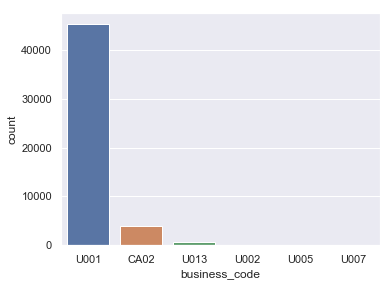

In [153]:
# countplot for 'business_code'

sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.countplot(x ='business_code', data = df)
print(df['business_code'].value_counts())

2019.0    40851
2020.0     9149
Name: buisness_year, dtype: int64


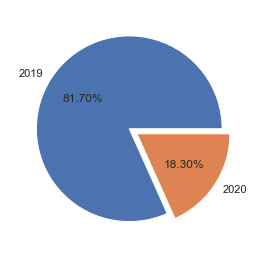

In [154]:
# pie chart to the percentage to data for 2019 and 2020
size = df['buisness_year'].value_counts()
label = ["2019","2020"]
exp = [0.0, 0.1]
plt.pie(size.tolist(),labels=label,autopct="%.2f%%",explode=exp)
print(size)
plt.show()

USD    46042
CAD     3958
Name: invoice_currency, dtype: int64


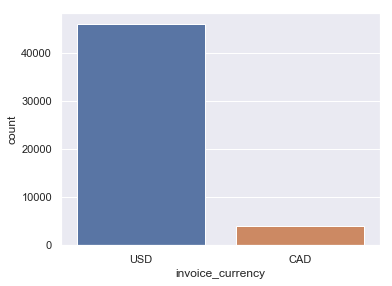

In [155]:
# countplot for 'invoice_currency'

sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.countplot(x ='invoice_currency', data = df)
print(df['invoice_currency'].value_counts())

0    46996
1     3004
Name: isOpen, dtype: int64


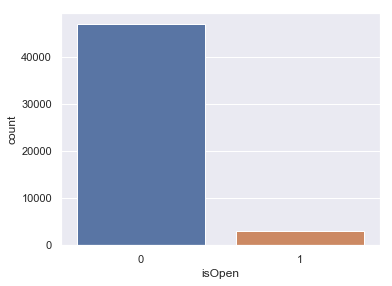

In [156]:
# countplot for 'isOpen'

sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.countplot(x ='isOpen', data = df)
print(df['isOpen'].value_counts())

# Preprosessing

In [157]:
# drop rows on the basis of above analysis
# reasons for dropping cols:
# 'area_business' : all null
# 'doc_id'/'invoice_id' : all different value
# 'posting_id' : all same value

df.drop(['doc_id', 'invoice_id', 'document type', 'area_business', 'posting_id'], axis = 1, inplace = True)
print(df.shape)
df.head()

(50000, 14)


,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0100031704,DELHAIZE us,2019-12-17 00:00:00,2019.0,2019-11-29,20191129,20191129,20191214.0,USD,108836.23,20191129.0,NAA8,0
1,U001,0200769623,WAL-MAR foundation,2019-10-21 00:00:00,2019.0,2019-10-09,20191008,20191009,20191024.0,USD,63424.63,20191009.0,NAH4,0
2,U001,0200761734,H E BUT llc,2020-03-11 00:00:00,2020.0,2020-02-26,20200225,20200226,20200312.0,USD,121487.94,20200226.0,NAA8,0
3,U001,0200705742,DOT llc,2019-08-01 00:00:00,2019.0,2019-07-12,20190712,20190712,20190813.0,USD,12850.60,20190712.0,NA32,0
4,U001,0200769623,WAL-MAR llc,2019-03-05 00:00:00,2019.0,2019-02-23,20190221,20190223,20190310.0,USD,705.86,20190223.0,NAH4,0


In [158]:
# date time format Conversion

df.clear_date = pd.to_datetime(df.clear_date, format='%Y-%m-%d %H:%M:%S')
df.posting_date = pd.to_datetime(df.posting_date, format='%Y-%m-%d')
df.document_create_date = pd.to_datetime(df.document_create_date, format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df.due_in_date = pd.to_datetime(df.due_in_date, format='%Y%m%d')
df.baseline_create_date = pd.to_datetime(df.baseline_create_date, format='%Y%m%d')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0100031704,DELHAIZE us,2019-12-17,2019.0,2019-11-29,2019-11-29,2019-11-29,2019-12-14,USD,108836.23,2019-11-29,NAA8,0
1,U001,0200769623,WAL-MAR foundation,2019-10-21,2019.0,2019-10-09,2019-10-08,2019-10-09,2019-10-24,USD,63424.63,2019-10-09,NAH4,0
2,U001,0200761734,H E BUT llc,2020-03-11,2020.0,2020-02-26,2020-02-25,2020-02-26,2020-03-12,USD,121487.94,2020-02-26,NAA8,0
3,U001,0200705742,DOT llc,2019-08-01,2019.0,2019-07-12,2019-07-12,2019-07-12,2019-08-13,USD,12850.60,2019-07-12,NA32,0
4,U001,0200769623,WAL-MAR llc,2019-03-05,2019.0,2019-02-23,2019-02-21,2019-02-23,2019-03-10,USD,705.86,2019-02-23,NAH4,0


In [160]:
# comparing two columns and calculating number of same rows in both columns

def compare2Col(colA, colB):
    daysDiff = df[colA] - df[colB] # calculating days difference
    print(colA, "--", colB, ": ", end = " ")
    return daysDiff[abs(daysDiff.dt.days) == 0].shape[0]  # returning number of same values in 2 columns

lst = ['document_create_date', 'document_create_date.1', 'baseline_create_date', 'posting_date'] # comparing only these cols
print("No of same values among following pair of columns") 
print()
for i in range(len(lst)):
    for j in lst[i+1:]:
        print(compare2Col(lst[i], j))

No of same values among following pair of columns

document_create_date -- document_create_date.1 :  21198
document_create_date -- baseline_create_date :  15951
document_create_date -- posting_date :  21200
document_create_date.1 -- baseline_create_date :  44457
document_create_date.1 -- posting_date :  49998
baseline_create_date -- posting_date :  44455


In [162]:
# converting CAD to USD

boolarr = df['invoice_currency'] == 'CAD'
print("Old values: ")
print(df.total_open_amount[boolarr].head())
df.total_open_amount[boolarr] = df.total_open_amount[boolarr] * 0.75
print("Updated values: ")
print(df.total_open_amount[boolarr].head())

Old values: 
9     16108.56
13    33549.25
14    42900.43
26    76876.16
36      344.92
Name: total_open_amount, dtype: float64
Updated values: 
9     12081.4200
13    25161.9375
14    32175.3225
26    57657.1200
36      258.6900
Name: total_open_amount, dtype: float64


In [163]:
# dropping invoice_currency as now it is of no use
df.drop(['invoice_currency'], axis = 1, inplace = True)
df.rename(columns = {'total_open_amount' : 'amount_inUSD'}, inplace = True)
print(df.shape)
df.head()

(50000, 13)


,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,amount_inUSD,baseline_create_date,cust_payment_terms,isOpen
0,U001,0100031704,DELHAIZE us,2019-12-17,2019.0,2019-11-29,2019-11-29,2019-11-29,2019-12-14,108836.23,2019-11-29,NAA8,0
1,U001,0200769623,WAL-MAR foundation,2019-10-21,2019.0,2019-10-09,2019-10-08,2019-10-09,2019-10-24,63424.63,2019-10-09,NAH4,0
2,U001,0200761734,H E BUT llc,2020-03-11,2020.0,2020-02-26,2020-02-25,2020-02-26,2020-03-12,121487.94,2020-02-26,NAA8,0
3,U001,0200705742,DOT llc,2019-08-01,2019.0,2019-07-12,2019-07-12,2019-07-12,2019-08-13,12850.60,2019-07-12,NA32,0
4,U001,0200769623,WAL-MAR llc,2019-03-05,2019.0,2019-02-23,2019-02-21,2019-02-23,2019-03-10,705.86,2019-02-23,NAH4,0


### Splitting

In [166]:
#splitting 
df_Trainset = df[df.isOpen == 0] # if isOpen == 0 or clear_date == notNULL
df_Testset = df[df.isOpen == 1] # if isOpen == 1 or clear_date == Null

In [167]:
# sorting train data on document_create_date.1

df_Trainset.sort_values(by="document_create_date.1", inplace = True)
df_Trainset.reset_index(inplace = True, drop = True)
print(df_Trainset.shape)
df_Trainset.head()

(46996, 13)


,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,amount_inUSD,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,43020.23,2018-12-30,NAH4,0
1,U001,0200726979,BJ'S co,2019-01-22,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,135.48,2018-12-30,NAA8,0
2,U001,0200795490,HY - systems,2019-01-17,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,77726.95,2018-12-30,NAA8,0
3,U001,0200769623,WAL-MAR corporation,2019-01-10,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,49518.31,2018-12-30,NAH4,0
4,U013,0100009932,SYSCO IN corp,2019-02-28,2019.0,2018-12-30,2018-12-28,2018-12-30,2019-01-29,18602.72,2018-12-30,NAVE,0


In [168]:
# removing anomalies:
# condition:
# document_create_date/document_create_date.1 <= posting_date <= baseline_create_date <= due_in_date/clear_date
def dropAnomalies(colA, colB):
    print(colA,"--", colB, ": ", df_Trainset[(df_Trainset[colA] - df_Trainset[colB]).dt.days < 0].shape[0])
    df_Trainset.drop(df_Trainset[(df_Trainset[colA] - df_Trainset[colB]).dt.days < 0].index, inplace = True) # droping if not satisfied the above commented condition
    df_Trainset.reset_index(inplace = True, drop = True)
    
lst = [['document_create_date', 'document_create_date.1'], ['posting_date'], ['baseline_create_date'], ['due_in_date', 'clear_date']]   
for i in range(len(lst)):
    for x in lst[i]:
        for j in lst[i+1:]:
            for y in j:
                dropAnomalies(y, x)

print(df_Trainset.shape)

posting_date -- document_create_date :  3319
baseline_create_date -- document_create_date :  2113
due_in_date -- document_create_date :  0
clear_date -- document_create_date :  0
posting_date -- document_create_date.1 :  0
baseline_create_date -- document_create_date.1 :  0
due_in_date -- document_create_date.1 :  0
clear_date -- document_create_date.1 :  0
baseline_create_date -- posting_date :  0
due_in_date -- posting_date :  0
clear_date -- posting_date :  0
due_in_date -- baseline_create_date :  0
clear_date -- baseline_create_date :  5
(41559, 13)


In [169]:
# splitting train into 3 part
# 1st 70% = on which we will train model
# 2nd 15% = for val1
# 3rd 15% = for val2

len_df_Trainset = df_Trainset.shape[0]

trainIndex = int(len_df_Trainset * 0.70)
val1Index = int(len_df_Trainset * 0.85)

# used slicing for splitting
dfTrain = df_Trainset[: trainIndex]
dfVal1 = df_Trainset[trainIndex : val1Index]
dfVal2 = df_Trainset[val1Index :]

# index reset
dfVal1.reset_index(inplace = True, drop = True)
dfVal2.reset_index(inplace = True, drop = True)

print(df_Trainset.shape[0])
print(dfTrain.shape[0], dfVal1.shape[0], dfVal1.shape[0])
print(dfTrain.shape[0] + dfVal1.shape[0] + dfVal1.shape[0])

41559
29091 6234 6234
41559


### Creating new features

In [170]:
#adding 4 features:
# due_date_quarter, diff_due_baseline, dueDateMonth, createDateMonth

def addFeatures(dF):
    dF['due_date_quarter'] = dF.due_in_date.dt.quarter
    dF["diff_due_baseline"]=(dF.due_in_date - dF.baseline_create_date).dt.days
    dF['dueDateMonth'] = dF.due_in_date.dt.month
    dF['createDateMonth'] = dF['document_create_date.1'].dt.month
    dF['delay_days'] = (dF.clear_date - dF.due_in_date).dt.days

def addFeaturesTest(dF):
    dF['due_date_quarter'] = dF.due_in_date.dt.quarter
    dF["diff_due_baseline"]=(dF.due_in_date - dF.baseline_create_date).dt.days
    dF['dueDateMonth'] = dF.due_in_date.dt.month
    dF['createDateMonth'] = dF['document_create_date.1'].dt.month
    

In [171]:
# calling addfeatures for train, val1, val2
addFeatures(dfTrain)
addFeatures(dfVal1)
addFeatures(dfVal2)

# calling addfeaturesTest for Final testing data
addFeaturesTest(df_Testset)
dfTrain.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,amount_inUSD,baseline_create_date,cust_payment_terms,isOpen,due_date_quarter,diff_due_baseline,dueDateMonth,createDateMonth,delay_days
0,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,43020.23,2018-12-30,NAH4,0,1,15,1,12,-5
1,U001,0200726979,BJ'S co,2019-01-22,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,135.48,2018-12-30,NAA8,0,1,15,1,12,8
2,U001,0200795490,HY - systems,2019-01-17,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,77726.95,2018-12-30,NAA8,0,1,15,1,12,3
3,U001,0200769623,WAL-MAR corporation,2019-01-10,2019.0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,49518.31,2018-12-30,NAH4,0,1,15,1,12,-4
4,U013,0100009932,SYSCO IN corp,2019-02-28,2019.0,2018-12-30,2018-12-28,2018-12-30,2019-01-29,18602.72,2018-12-30,NAVE,0,1,30,1,12,30


# EDA

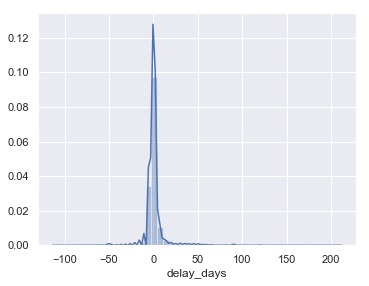

In [172]:
# distplot for delay days
sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.distplot(dfTrain.delay_days)

In [173]:
# we can see that this is right skewed hence outliers need to be removed

In [174]:
#using interquartile range to find upper and lower bound
#data which will not fit in this range will be dropped
#used quantile range as 95% to 5% and distance as 4

IQR = dfTrain['delay_days'].quantile(0.95) - dfTrain['delay_days'].quantile(0.05)
lower_boundary = dfTrain['delay_days'].quantile(0.05) - (IQR * 4)
upper_boundary = dfTrain['delay_days'].quantile(0.95) + (IQR * 4)
print(lower_boundary)
print(upper_boundary)

l = [x for x in range(int(lower_boundary), int(upper_boundary))]
dfTrain = dfTrain[dfTrain['delay_days'].isin(l)]
dfTrain.shape # shape after dropping

-73.0
80.0


(28958, 18)

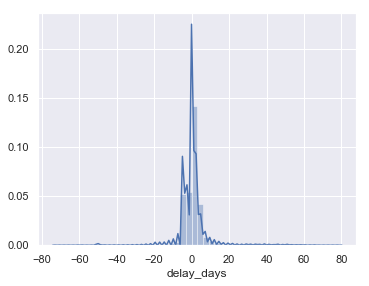

In [175]:
# distplot for delay days

sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.distplot(dfTrain.delay_days)

now it is normal

In [176]:
#  dropping all dates columns and the columns we are not using as features
dfTrain.drop(['document_create_date','posting_date', 'clear_date', 'document_create_date.1', 'due_in_date', 'baseline_create_date', 'isOpen', 'buisness_year'], axis = 1, inplace = True)
dfVal1.drop(['document_create_date','posting_date', 'clear_date', 'document_create_date.1', 'due_in_date', 'baseline_create_date', 'isOpen', 'buisness_year'], axis = 1, inplace = True)
dfVal2.drop(['document_create_date','posting_date', 'clear_date', 'document_create_date.1', 'due_in_date', 'baseline_create_date', 'isOpen', 'buisness_year'], axis = 1, inplace = True)
dueDateTest = df_Testset.due_in_date
df_Testset.drop(['document_create_date','posting_date', 'clear_date', 'document_create_date.1', 'due_in_date', 'baseline_create_date', 'isOpen', 'buisness_year'], axis = 1, inplace = True)
x_test = df_Testset.copy()
dfTrain.head()

,business_code,cust_number,name_customer,amount_inUSD,cust_payment_terms,due_date_quarter,diff_due_baseline,dueDateMonth,createDateMonth,delay_days
0,U001,0200769623,WAL-MAR associates,43020.23,NAH4,1,15,1,12,-5
1,U001,0200726979,BJ'S co,135.48,NAA8,1,15,1,12,8
2,U001,0200795490,HY - systems,77726.95,NAA8,1,15,1,12,3
3,U001,0200769623,WAL-MAR corporation,49518.31,NAH4,1,15,1,12,-4
4,U013,0100009932,SYSCO IN corp,18602.72,NAVE,1,30,1,12,30


### Encoding (Target)

In [101]:
# doing target encoding on train set andmapping them on val and test set
# filling Nan with 0
# dF1 = train , dF2 = val1 , dF3 = val2 , dF4 = test
# encoding 4 columns: business_code, cust_number, cust_payment_terms, name_customer
def encoding(dF1, dF2, dF3, dF4):
    label1 = dF1.groupby(['business_code'])['delay_days'].mean().to_dict()
    dF1['business_code'] = dF1['business_code'].map(label1)
    dF2['business_code'] = dF2['business_code'].map(label1)
    dF2['business_code'] = dF2['business_code'].fillna(0)
    dF3['business_code'] = dF3['business_code'].map(label1)
    dF3['business_code'] = dF3['business_code'].fillna(0)
    dF4['business_code'] = dF4['business_code'].map(label1)
    dF4['business_code'] = dF4['business_code'].fillna(0)
    
    label2 = dF1.groupby(['cust_number'])['delay_days'].mean().to_dict()
    dF1['cust_number'] = dF1['cust_number'].map(label2)
    dF2['cust_number'] = dF2['cust_number'].map(label2)
    dF2['cust_number'] = dF2['cust_number'].fillna(0)
    dF3['cust_number'] = dF3['cust_number'].map(label2)
    dF3['cust_number'] = dF3['cust_number'].fillna(0)
    dF4['cust_number'] = dF4['cust_number'].map(label2)
    dF4['cust_number'] = dF4['cust_number'].fillna(0)
    
    label3 = dF1.groupby(['cust_payment_terms'])['delay_days'].mean().to_dict()
    dF1['cust_payment_terms'] = dF1['cust_payment_terms'].map(label3)
    dF2['cust_payment_terms'] = dF2['cust_payment_terms'].map(label3)
    dF2['cust_payment_terms'] = dF2['cust_payment_terms'].fillna(0)
    dF3['cust_payment_terms'] = dF3['cust_payment_terms'].map(label3)
    dF3['cust_payment_terms'] = dF3['cust_payment_terms'].fillna(0)
    dF4['cust_payment_terms'] = dF4['cust_payment_terms'].map(label3)
    dF4['cust_payment_terms'] = dF4['cust_payment_terms'].fillna(0)
    
    label4 = dF1.groupby(['name_customer'])['delay_days'].mean().to_dict()
    dF1['name_customer'] = dF1['name_customer'].map(label4)
    dF2['name_customer'] = dF2['name_customer'].map(label4)
    dF2['name_customer'] = dF2['name_customer'].fillna(0)
    dF3['name_customer'] = dF3['name_customer'].map(label4)
    dF3['name_customer'] = dF3['name_customer'].fillna(0)
    dF4['name_customer'] = dF4['name_customer'].map(label4)
    dF4['name_customer'] = dF4['name_customer'].fillna(0)

In [102]:
# Calling Encoding function 
encoding(dfTrain, dfVal1, dfVal2, df_Testset)

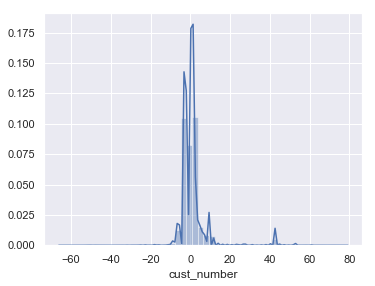

In [103]:
# distplot for cust_number

sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.distplot(dfTrain.cust_number)

This plot is normal

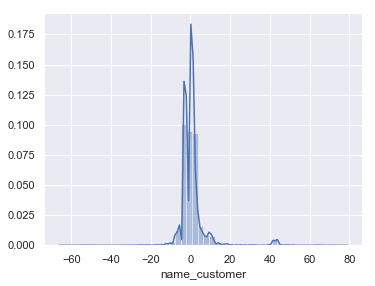

In [104]:
# distplot for name_customer

sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.distplot(dfTrain.name_customer)

this plot is also normal

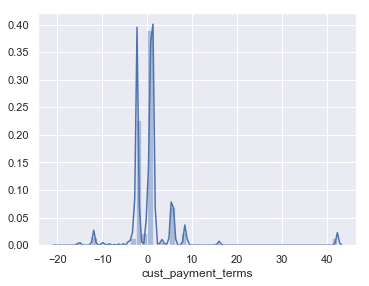

In [105]:
# distplot for cust_payment_terms

sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.distplot(dfTrain.cust_payment_terms)

Right skewed so outliers need to be removed

In [106]:
#using interquartile range to find upper and lower bound
#data which will not fit in this range will be dropped
#used quantile range as 80% to 20% and distance as 3

IQR = dfTrain['cust_payment_terms'].quantile(0.80) - dfTrain['cust_payment_terms'].quantile(0.20)
lower_boundary = dfTrain['cust_payment_terms'].quantile(0.20) - (IQR * 3)
upper_boundary = dfTrain['cust_payment_terms'].quantile(0.80) + (IQR * 3)
print(lower_boundary)
print(upper_boundary)

l = [x for x in range(int(lower_boundary), int(upper_boundary))]
dfTrain = dfTrain[dfTrain['cust_payment_terms'].astype(int).isin(l)]
dfTrain.shape

-12.307685222400682
11.125865541088292


(28197, 10)

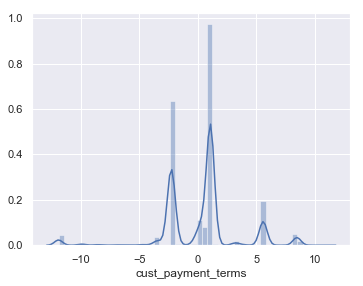

In [107]:
# distplot for cust_payment_terms

sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.distplot(dfTrain.cust_payment_terms)

Now this is kind of normal (better than before)

In [108]:
dfTrain.head()

,business_code,cust_number,name_customer,amount_inUSD,cust_payment_terms,due_date_quarter,diff_due_baseline,dueDateMonth,createDateMonth,delay_days
0,0.377521,-2.674901,-2.639368,43020.23,-2.264735,1,15,1,12,-5
1,0.377521,0.863333,0.882353,135.48,1.082915,1,15,1,12,8
2,0.377521,2.307692,2.750000,77726.95,1.082915,1,15,1,12,3
3,0.377521,-2.674901,-2.900452,49518.31,-2.264735,1,15,1,12,-4
4,6.498818,2.862069,5.750000,18602.72,1.192708,1,30,1,12,30


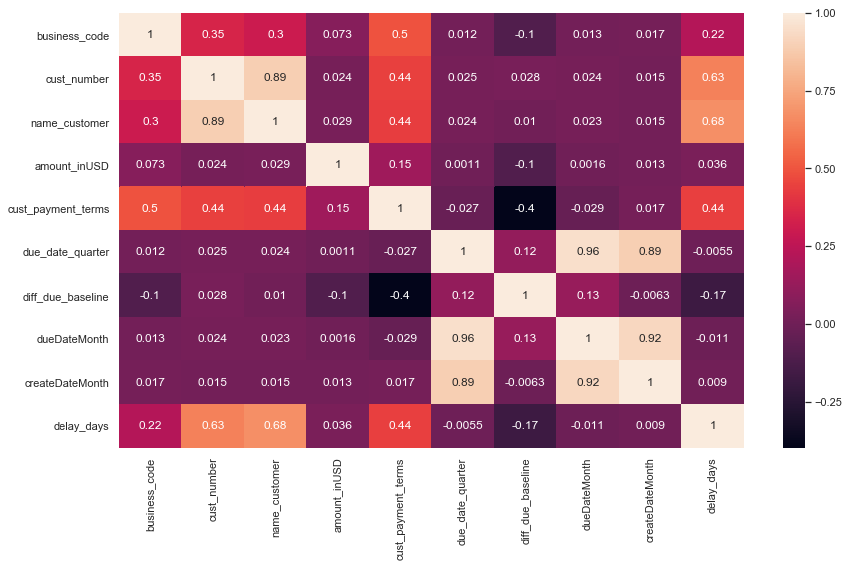

In [109]:
# plotting correlation matrix

corr = dfTrain.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [110]:
# Splitting into x_train and y_train
# taking delay days as target

xTrain = dfTrain.loc[:, dfTrain.columns != 'delay_days']
yTrain = dfTrain.delay_days

xTestVal1 = dfVal1.loc[:, dfVal1.columns != 'delay_days']
yTestVal1 = dfVal1.delay_days

xTestVal2 = dfVal2.loc[:, dfVal2.columns != 'delay_days']
yTestVal2 = dfVal2.delay_days

xTrain.columns

Index(['business_code', 'cust_number', 'name_customer', 'amount_inUSD',
       'cust_payment_terms', 'due_date_quarter', 'diff_due_baseline',
       'dueDateMonth', 'createDateMonth'],
      dtype='object')

## Feature Selection

In [111]:
# Embedded method used

def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=80)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(5).plot(kind='barh')  
    return final_df

,Features,Importances
2,name_customer,0.470634
4,cust_payment_terms,0.189223
3,amount_inUSD,0.145451
1,cust_number,0.095712
6,diff_due_baseline,0.033474
8,createDateMonth,0.028312
7,dueDateMonth,0.026255
5,due_date_quarter,0.008032
0,business_code,0.002907


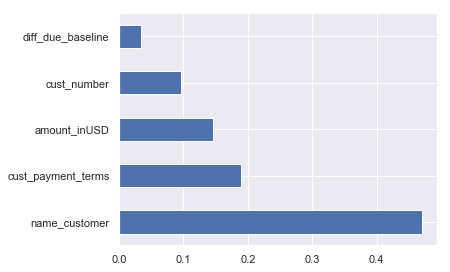

In [112]:
feature_importance = tree_based_feature_importance(xTrain,yTrain)
feature_importance

In [113]:
impFeature = feature_importance['Features'].to_list()[:5]

# passing only top 5 imp features for model traning which we get from feature selection
xTrain = xTrain[impFeature]
xTestVal1 = xTestVal1[impFeature]
xTestVal2 = xTestVal2[impFeature]
df_Testset = df_Testset[impFeature]


## Scaling

In [114]:
# StandardScaler function
def stdScale(dF1):
    scaler = preprocessing.StandardScaler()
    scaler.fit(dF1)
    dF1 = scaler.transform(dF1)
    return dF1

In [115]:
# calling StandardScaler function for each x dataset ie: xTrain, xTestVal1, xTestVal2, df_Testset
xTrain = stdScale(xTrain)
xTestVal1 = stdScale(xTestVal1)
xTestVal2 = stdScale(xTestVal2)
df_Testset = stdScale(df_Testset)

# modeling without tuning
1. creating train_and_getScores function that will take 2 arg xtest and ytest and rest 2 are default parameters xtrain and ytrain
2. it will return the comparion dataframe for all regression models score

In [116]:
# creating train_and_getScores function that will take 2 arg xtest and ytest and rest 2 are default parameters xtrain and ytrain
# it will return the comparion dataframe for all regression models score
def train_and_getScores(xTe, yTe, xTr = xTrain, yTr = yTrain):
    MSE_Score = [] # list to hold all models mse score
    R2_Score = [] # list to hold all models r2score score
    RMSE_Score = [] # list to hold all models rmse score
    Algorithm = [] # list to hold all models name score

    # traning on Linear Regression
    Algorithm.append('Linear Regression')
    clf = LinearRegression()  # LinearRegression classifier
    clf.fit(xTr, yTr)  # fitting xtrain and ytrain on classifier
    predicted = clf.predict(xTe) # predicting on xtest
    MSE_Score.append(mean_squared_error(yTe, predicted)) # calculating mse score and append to list
    R2_Score.append(r2_score(yTe, predicted)) # calculating r2score score and append to list
    RMSE_Score.append(math.sqrt(mean_squared_error(yTe, predicted))) # calculating rmse score and append to list

    
    # traning on Support Vector Regression
    Algorithm.append('Support Vector Regression')
    clf = SVR() # SVR classifier
    clf.fit(xTr, yTr) # fitting xtrain and ytrain on classifier
    predicted = clf.predict(xTe) # predicting on xtest
    MSE_Score.append(mean_squared_error(yTe, predicted)) # calculating mse score and append to list
    R2_Score.append(r2_score(yTe, predicted)) # calculating r2score score and append to list
    RMSE_Score.append(math.sqrt(mean_squared_error(yTe, predicted))) # calculating rmse score and append to list


    # traning on Decision Tree Regressor
    Algorithm.append('Decision Tree Regressor')
    clf = DecisionTreeRegressor() # DecisionTreeRegressor classifier
    clf.fit(xTr, yTr) # fitting xtrain and ytrain on classifier
    predicted = clf.predict(xTe) # predicting on xtest
    MSE_Score.append(mean_squared_error(yTe, predicted)) # calculating mse score and append to list
    R2_Score.append(r2_score(yTe, predicted)) # calculating r2score score and append to list
    RMSE_Score.append(math.sqrt(mean_squared_error(yTe, predicted))) # calculating rmse score and append to list


    # traning on Random Forest Regressor
    Algorithm.append('Random Forest Regressor')
    clf = RandomForestRegressor() #RandomForestRegressor classifier
    clf.fit(xTr, yTr) # fitting xtrain and ytrain on classifier
    predicted = clf.predict(xTe) # predicting on xtest
    MSE_Score.append(mean_squared_error(yTe, predicted)) # calculating mse score and append to list
    R2_Score.append(r2_score(yTe, predicted)) # calculating r2score score and append to list
    RMSE_Score.append(math.sqrt(mean_squared_error(yTe, predicted))) # calculating rmse score and append to list


    # traning on XGB Regressor
    Algorithm.append('XGB Regressor')
    clf = xgb.XGBRegressor() #XGBRegressor classifier
    clf.fit(xTr, yTr) # fitting xtrain and ytrain on classifier
    predicted = clf.predict(xTe) # predicting on xtest
    MSE_Score.append(mean_squared_error(yTe, predicted)) # calculating mse score and append to list
    R2_Score.append(r2_score(yTe, predicted)) # calculating r2score score and append to list
    RMSE_Score.append(math.sqrt(mean_squared_error(yTe, predicted))) # calculating rmse score and append to list

    
    Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score, RMSE_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score', 'RMSE_Score'])
    return Comparison

# HyperParameter tunning
1. creating train_and_getScores function that will take 2 arg xtest and ytest and rest 2 are default parameters xtrain and ytrain
2. it will return the comparion dataframe for all regression models score
3. classifier which are commented are not giving best results
4. all other comments are same as models without tunning
5. Used hit and trial method

In [117]:
# creating train_and_getScores function that will take 2 arg xtest and ytest and rest 2 are default parameters xtrain and ytrain
# it will return the comparion dataframe for all regression models score
# classifier which are commented are not giving best results
# all other comments are same as models without tunning

def best_HyperTunning(xTe, yTe, xTr = xTrain, yTr = yTrain):
    MSE_Score = [] # list to hold all models mse score
    R2_Score = [] # list to hold all models r2score score
    RMSE_Score = [] # list to hold all models rmse score
    Algorithm = [] # list to hold all models name score

    # traning on Linear Regression
    Algorithm.append('Linear Regression')
    clf = LinearRegression()
    #clf = LinearRegression(fit_intercept=False, normalize=True, copy_X=True, n_jobs=None)
    clf.fit(xTr, yTr)
    predicted = clf.predict(xTe)
    MSE_Score.append(mean_squared_error(yTe, predicted))
    R2_Score.append(r2_score(yTe, predicted))
    RMSE_Score.append(math.sqrt(mean_squared_error(yTe, predicted)))

    
    
    # traning on Support Vector Regression
    Algorithm.append('Support Vector Regression')
    #clf = SVR(kernel='poly', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=1.0, epsilon=12.0, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
    #clf = SVR(kernel='rbf', degree=1, gamma='auto', coef0=0.0, tol=0.001, C=1.0, epsilon=10.0, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
    clf = SVR(kernel='poly', degree=1, gamma='auto', coef0=0.0, tol=0.001, C=1.0, epsilon=10.0, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
    clf.fit(xTr, yTr)
    predicted = clf.predict(xTe)
    MSE_Score.append(mean_squared_error(yTe, predicted))
    R2_Score.append(r2_score(yTe, predicted))
    RMSE_Score.append(math.sqrt(mean_squared_error(yTe, predicted)))

    
    
    # traning on Decision Tree Regressor
    Algorithm.append('Decision Tree Regressor')
    #clf = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=15, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None)
    #clf = DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None)
    clf = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=6, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None)
    clf.fit(xTr, yTr)
    predicted = clf.predict(xTe)
    MSE_Score.append(mean_squared_error(yTe, predicted))
    R2_Score.append(r2_score(yTe, predicted))
    RMSE_Score.append(math.sqrt(mean_squared_error(yTe, predicted)))

    
    
    # traning on Random Forest Regressor
    Algorithm.append('Random Forest Regressor')
    #clf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)
    clf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=6, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)
    clf.fit(xTr, yTr)
    predicted = clf.predict(xTe)
    MSE_Score.append(mean_squared_error(yTe, predicted))
    R2_Score.append(r2_score(yTe, predicted))
    RMSE_Score.append(math.sqrt(mean_squared_error(yTe, predicted)))

    
    
    # traning on XGB Regressor
    Algorithm.append('XGB Regressor')
    #clf = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.9, learning_rate = 0.5, max_depth = 10, alpha = 10, n_estimators = 10)
    #clf = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.1, learning_rate = 0.5, max_depth = 5, alpha = 10, n_estimators = 10)
    clf = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.9, learning_rate = 0.5, max_depth = 5, alpha = 10, n_estimators = 10)
    clf.fit(xTr, yTr)
    predicted = clf.predict(xTe)
    MSE_Score.append(mean_squared_error(yTe, predicted))
    R2_Score.append(r2_score(yTe, predicted))
    RMSE_Score.append(math.sqrt(mean_squared_error(yTe, predicted)))
    
    
    Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score, RMSE_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score', 'RMSE_Score'])
    return Comparison

In [118]:
### testing on Val1 without tunning

In [119]:
Comparison_Table1 = train_and_getScores(xTestVal1, yTestVal1)
Comparison_Table1

[10:42:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Algorithm,MSE_Score,R2_Score,RMSE_Score
0,Linear Regression,24.892504,0.422232,4.989239
1,Support Vector Regression,37.037220,0.140347,6.085821
2,Decision Tree Regressor,50.654577,-0.175719,7.117203
3,Random Forest Regressor,34.454466,0.200294,5.869793
4,XGB Regressor,27.953497,0.351185,5.287107


In [120]:
### testing on Val2 without tunning

In [121]:
Comparison_Table2 = train_and_getScores(xTestVal2, yTestVal2)
Comparison_Table2

[10:44:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Algorithm,MSE_Score,R2_Score,RMSE_Score
0,Linear Regression,59.344556,0.410974,7.703542
1,Support Vector Regression,86.077830,0.145633,9.277814
2,Decision Tree Regressor,101.032345,-0.002798,10.051485
3,Random Forest Regressor,69.389806,0.311270,8.330054
4,XGB Regressor,59.958362,0.404882,7.743279


In [122]:
### testing on Val1 with tunning

In [123]:
Comparison_Table3 = best_HyperTunning(xTestVal1, yTestVal1)
Comparison_Table3

[10:45:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Algorithm,MSE_Score,R2_Score,RMSE_Score
0,Linear Regression,24.892504,0.422232,4.989239
1,Support Vector Regression,26.400751,0.387225,5.138166
2,Decision Tree Regressor,28.456524,0.339509,5.334466
3,Random Forest Regressor,28.160822,0.346373,5.306677
4,XGB Regressor,30.197311,0.299105,5.495208


In [124]:
### testing on Val2 with tunning

In [125]:
Comparison_Table4 = best_HyperTunning(xTestVal2, yTestVal2)
Comparison_Table4

[10:45:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Algorithm,MSE_Score,R2_Score,RMSE_Score
0,Linear Regression,59.344556,0.410974,7.703542
1,Support Vector Regression,57.754426,0.426757,7.599633
2,Decision Tree Regressor,63.005268,0.374640,7.937586
3,Random Forest Regressor,62.609081,0.378572,7.912590
4,XGB Regressor,62.161751,0.383012,7.884272


# Best model is SVM
### Predicting dalay days for Test data on SVM

In [126]:
# using same funtion as used in hyper parameter tunning
clf = SVR(kernel='poly', degree=1, gamma='auto', coef0=0.0, tol=0.001, C=1.0, epsilon=10.0, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
clf.fit(xTrain, yTrain) # fiiting classifier
predicted = clf.predict(df_Testset) # predicting on test data
predicted

array([-9.5483692 ,  2.54152462,  2.16208137, ...,  3.53096073,
        2.99431749,  3.14789761])

In [127]:
predicted = np.round(predicted).astype(int) # rounding off the predicted values
pred_DF = pd.DataFrame() # creating a new dataframe to store predicted values
pred_DF['predicted_delay'] = predicted # adding predicted_delay column to pred_DF dataframe

In [188]:
# iterating over predicted_delay and moving them to required buckets

l1 = pred_DF['predicted_delay'].tolist() # pd series to list conversion
l2 = [] # empty list which will hold the bucket value
for x in l1:
    if x < 0:
        l2.append('< 0 days')
    elif x >= 0 and x <= 15:
        l2.append('0-15 days')
    elif x >= 16 and x <= 30:
        l2.append('16-30 days')
    elif x >=31 and x <= 45:
        l2.append('31-45 days')
    elif x >=46 and x <= 60:
        l2.append('46-60 days')
    else:
        l2.append('> 60 days')

In [194]:
pred_DF['Bucket'] = pd.DataFrame(l2) # adding the list to pred_DF dataframe by making bucket column
pred_DF #print all final prediction
#pred_DF.to_csv('pred_DF.csv') 

,predicted_delay,Bucket
0,-10,< 0 days
1,3,0-15 days
2,2,0-15 days
3,4,0-15 days
4,3,0-15 days
5,2,0-15 days
6,-2,< 0 days
7,-1,< 0 days
8,-2,< 0 days
9,3,0-15 days


0-15 days     1765
< 0 days      1219
46-60 days      16
16-30 days       3
31-45 days       1
Name: Bucket, dtype: int64


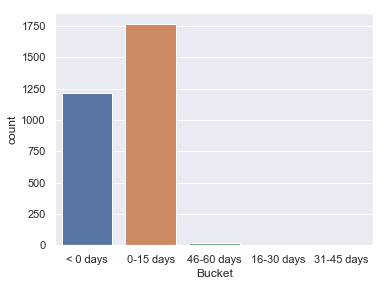

In [196]:
sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.countplot(x ='Bucket', data = pred_DF)
print(pred_DF['Bucket'].value_counts())